In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [92]:
train = pd.read_csv('./sample_data/train.csv')
test = pd.read_csv('./sample_data/test.csv')

In [93]:
# Removing id column and splitting features and labels form train data
x = train.iloc[:,1:76]
y = train.iloc[:,-1]

In [94]:
# Removing id column from test datatest.head()
test_new = test.iloc[:,1:76]

In [95]:
# One hot encoding

# y = pd.get_dummies(y)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_transform = le.fit_transform(y)

In [96]:
# Checking Null values
# pd.options.display.max_rows = 4000
# x.isnull().values.any()
test_new.isnull().values.any()

False

In [97]:
# inspecting features in train data
x.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,1.719655,1.422550,0.980955,2.444760,1.078085,1.406445,1.413200,1.389720,0.317740,1.656610,6.186895,1.438510,1.031415,1.465935,0.572000,1.061165,2.348775,0.774490,0.789325,2.326190,1.581820,0.598825,1.856545,1.516105,1.556650,0.681135,1.162070,0.665375,1.500505,1.276080,2.332940,1.255005,1.159385,0.834600,4.472965,0.890300,0.690865,2.413920,0.969055,1.527270,0.479560,2.275075,1.617085,0.622570,1.354225,6.008040,2.493365,2.118190,0.566695,0.927100,1.343715,1.666660,1.287270,2.764225,1.455190,0.696915,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,5.916988,3.288376,3.837771,3.421765,3.713650,2.868740,8.240441,3.056888,1.052619,2.557042,13.982531,2.666167,2.931762,6.734983,1.676326,5.718083,7.319992,1.752804,3.517043,8.402752,5.565404,1.418070,3.898896,7.782723,3.913513,2.307127,3.443417,2.637001,2.900480,4.268174,4.523171,4.482382,5.407836,3.496194,7.723795,2.150593,2.188692,9.774465,5.845938,4.375537,2.056233,5.227827,5.149637,1.953864,2.960980,11.286352,8.787684,4.107152,2.023164,2.697104,6.168400,6.387178,5.480586,8.251200,7.121127,2.185252,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

In [98]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)
# x_test_new = sc.fit_transform(x_test_new)

In [99]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

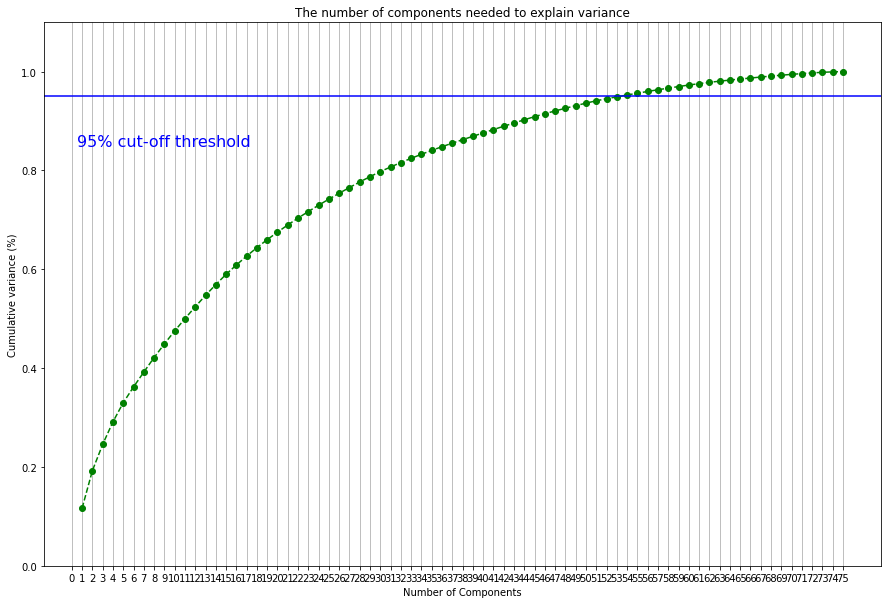

In [100]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots()
xi = np.arange(1, 76, step=1)
y1 = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y1, marker='o', linestyle='--', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 76, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'blue', fontsize=16)

ax.grid(axis='x')
plt.show()

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 53)
x = pca.fit_transform(x)
test_new = pca.transform(test_new)

In [102]:
# Splitting Train data for training and validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y_transform, test_size=0.2, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(160000, 53)
(160000,)
(40000, 53)
(40000,)


In [103]:
# Deep Neural Network 

In [104]:
# Hyper parameters
from keras import optimizers

# Learning rate
learning_rate = 0.01

# Epoch  
epochs = 50

# Batch size
batch_size = 10

# Optimizer
opt = optimizers.Adam(lr=learning_rate)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [105]:
# Sequential Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation

model = Sequential()
model.add(Dense(25, activation='relu', input_dim = 53))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [106]:
# Complie the model

model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                1350      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose = 1
)

In [109]:
a = history.history.get('accuracy')[-1]
print('Accuracy on Training data: %.2f' % (a*100))

Accuracy on Training data: 12.26


<function matplotlib.pyplot.show>

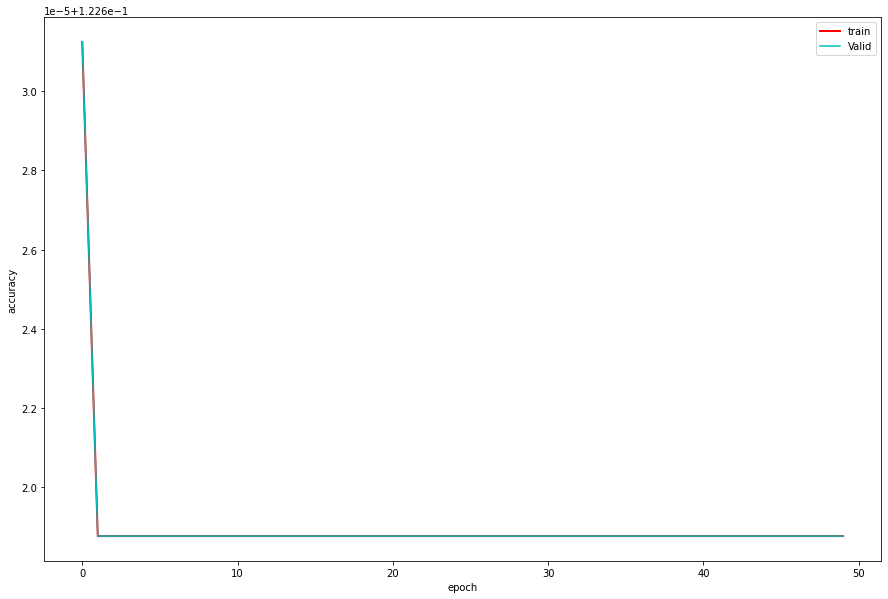

In [110]:
plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['accuracy'], 'c-',  label='accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show

In [111]:
score, accuracy = model.evaluate(x_val, y_val)
print('Accuracy on Testing data: %.2f' % (accuracy*100))

1250/1250 [==============================] - 2s 1ms/step - loss: -2289400104878080.0000 - accuracy: 0.1203
Accuracy on Testing data: 12.03
